# Pandas Example

## Section 1
### In this section, we will cover up how to load and plot dataframe
### And find the features of qualified red wine! :)

#### First import Pandas and Matplotlib.pyplot module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Now, construct dataframe from csv files. We will use the wine dataset  
#### You can download it from my repository

In [2]:
wine_data = pd.read_csv("datasets/winequality-red.csv")

#### Lets take a glance how the dataframe looks

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Everything looks okay
#### The dependent value is quality, so we will show quality on y axis
#### Lets see that can we will find strong correlation between quality and fixed acidity

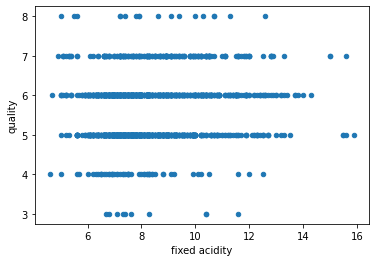

In [4]:
wine_data.plot(x="fixed acidity", y="quality", kind="scatter")
plt.show()

#### It's hard to see strong correlation in the figure with naked eye
#### We may try some other features

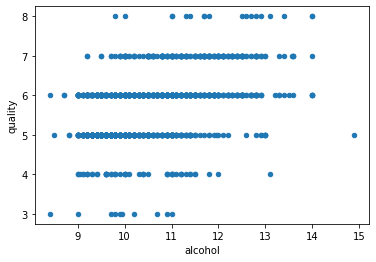

In [5]:
wine_data.plot(x="alcohol", y="quality", kind="scatter")
plt.show()

#### It's better
#### We can see that there is some kind of positive corelation between alcohol and red wine quality

## Section 2
### In this section, we will learn how to deal with messy dataframes
### Construct the dataframe from file

In [6]:
land_data = pd.read_csv("datasets/land-temperature.csv")
land_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


### There are a lot of NaN values, column names are too long
### And we don't need the column 'AverageTemperatureUncertainty'
### Delete the unnecessary column

In [7]:
land_data = land_data.drop(columns=["AverageTemperatureUncertainty"])
land_data.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


### Drop the rows whose AverageTemperature is NaN

In [8]:
land_data = land_data.dropna("index", subset=["AverageTemperature"])
land_data.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
5,1744-04-01,1.530,Åland
6,1744-05-01,6.702,Åland
7,1744-06-01,11.609,Åland
8,1744-07-01,15.342,Åland


### Change the column names

In [9]:
land_data = land_data.rename(columns={"dt": "Date", "AverageTemperature": "Temperature"})
land_data.head()

,Date,Temperature,Country
0,1743-11-01,4.384,Åland
5,1744-04-01,1.530,Åland
6,1744-05-01,6.702,Åland
7,1744-06-01,11.609,Åland
8,1744-07-01,15.342,Åland


### There are a lot of rows. What if we just want the records since 2000?

In [10]:
land_data = land_data.loc[land_data.Date > "2000-00-00"]
land_data.head()

,Date,Temperature,Country
3074,2000-01-01,0.197,Åland
3075,2000-02-01,-0.023,Åland
3076,2000-03-01,0.615,Åland
3077,2000-04-01,4.124,Åland
3078,2000-05-01,8.557,Åland


### What if we don't want every record but average of records for every country?

In [11]:
land_data = land_data.groupby("Country").mean()
land_data.head()

,Temperature
Country,
Afghanistan,15.402963
Africa,24.930043
Albania,13.630128
Algeria,24.291585
American Samoa,27.254415


### Indices have replaced with the country names
### Africa is not a country but a continent. Let's drop it

In [12]:
land_data = land_data.drop(index=["Africa"])
land_data.head()

,Temperature
Country,
Afghanistan,15.402963
Albania,13.630128
Algeria,24.291585
American Samoa,27.254415
Andorra,12.291945


### If we want the numerical indices back

In [13]:
land_data = land_data.reset_index()
land_data.head()

,Country,Temperature
0,Afghanistan,15.402963
1,Albania,13.630128
2,Algeria,24.291585
3,American Samoa,27.254415
4,Andorra,12.291945
